In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
data=pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data_test=pd.read_csv('test.csv')
data_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)
baris,kolom=data.shape
np.random.shuffle(data)

data_dev=data[:1000].T
Y_dev=data_dev[0]# label
X_dev=data_dev[1,kolom]
X_dev/=255.


data_train=data[1000:baris].T
Y_train=data_train[0]
X_train=data_train[1:kolom]
X_train=X_train/255.
_,m_train=X_train.shape

In [55]:
def init_params():
  W1=np.random.rand(10,data.shape[1]-1)-0.5
  b1=np.random.rand(10,1)-0.5
  W2=np.random.rand(10,10)-0.5
  b2=np.random.rand(10,1)-0.5

  return W1,b1,W2,b2

def ReLU(Z):
  return np.maximum(Z,0)

def softmax(Z):
  A=np.exp(Z)/sum(np.exp(Z))
  return A

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / baris * dZ2.dot(A1.T)
    db2 = 1 / baris * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / baris * dZ1.dot(X.T)
    db1 = 1 / baris * np.sum(dZ1)
    return dW1, db1, dW2, db2
    
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations,setting):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % setting == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

def make_prediction(X,W1,b1,W2,b2):
    _,_,_,A2=forward_prop(W1,b1,W2,b2,X)
    predict=get_predictions(A2)
    return predict
    
def test_prediction(index,W1,b1,W2,b2):
    gambar=X_train[:,index,None]
    prediction = make_prediction(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    gambar = gambar.reshape((28, 28)) * 255.0
    plt.gray()
    plt.imshow(gambar, interpolation='nearest')
    plt.show()

In [51]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,.10,500,10)

Iteration:  0
[2 2 2 ... 4 2 2] [9 1 0 ... 3 4 9]
0.0935609756097561
Iteration:  10
[4 9 0 ... 3 9 2] [9 1 0 ... 3 4 9]
0.2280487804878049
Iteration:  20
[4 8 0 ... 3 9 2] [9 1 0 ... 3 4 9]
0.33446341463414636
Iteration:  30
[4 8 0 ... 3 9 2] [9 1 0 ... 3 4 9]
0.40446341463414637
Iteration:  40
[4 8 0 ... 3 9 2] [9 1 0 ... 3 4 9]
0.458
Iteration:  50
[4 8 0 ... 3 9 9] [9 1 0 ... 3 4 9]
0.5032682926829268
Iteration:  60
[4 2 0 ... 3 4 9] [9 1 0 ... 3 4 9]
0.5426585365853659
Iteration:  70
[4 2 0 ... 3 4 9] [9 1 0 ... 3 4 9]
0.5780487804878048
Iteration:  80
[4 2 0 ... 3 4 9] [9 1 0 ... 3 4 9]
0.6087073170731707
Iteration:  90
[4 2 0 ... 3 4 9] [9 1 0 ... 3 4 9]
0.6374878048780488
Iteration:  100
[4 2 0 ... 3 4 9] [9 1 0 ... 3 4 9]
0.6612926829268293
Iteration:  110
[9 2 0 ... 3 4 9] [9 1 0 ... 3 4 9]
0.6823902439024391
Iteration:  120
[9 2 0 ... 3 4 9] [9 1 0 ... 3 4 9]
0.701
Iteration:  130
[9 2 0 ... 3 4 9] [9 1 0 ... 3 4 9]
0.7169756097560975
Iteration:  140
[9 2 0 ... 3 4 9] [9 1 0 

10
Prediction:  [3]
Label:  3


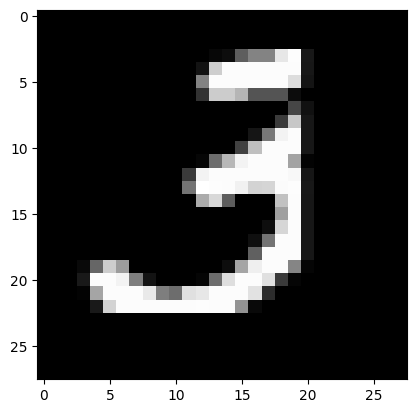

In [65]:
input_data=int(input('masukan angka:'))
print(input_data)
test_prediction(input_data,W1,b1,W2,b2)


In [33]:
dev_prediction=make_prediction(X_dev,W1,b1,W2,b2)
get_accuracy(dev_prediction,Y_dev)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

/tmp/ipykernel_3834/1905225536.py:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.sum(predictions == Y) / Y.size


0.0